#FirstName LastName (SIS ID#)

# ECI 115: Homework 4

## <font color='red'>**Problem 12.8**</font>

The Lower Colorado River consists of a series of four reservoirs as shown in Fig. P12.8. Mass balances can be written for each reservoir and the following set of simultaneous linear algebraic equations results:

$$
\begin{bmatrix}
13.442 & 0 & 0 & 0 \\
-13.442 & 12.252 & 0 & 0 \\
0 & -12.252 & 12.377 & 0 \\
0 & 0 & -12.377 & 11.797
\end{bmatrix}
\begin{Bmatrix} c_1 \\ c_2 \\ c_3 \\ c_4 \end{Bmatrix}
=
\begin{Bmatrix} 750.5 \\ 300 \\ 102 \\ 30 \end{Bmatrix}
$$


where the right-hand-side vector consists of the loadings of chloride to each of the four lakes and $c_1$, $c_2$, $c_3$, and $c_4$, are the resulting chloride concentrations for Lakes Powell, Mead, Mohave, and Havasu, respectively.

(a) Use the matrix inverse to solve for the concentration in each of the four lakes.

(b) How much must the loading to Lake Powell be reduced in order for the chloride concentration of Lake Havasu to be 75?

(c) Using the column-sum norm, compute the condition number and determine how many suspect digits would be generated by solving this system.

<p align="center">
  <img src="https://github.com/cdefinnda/ECI-115_HW-Images/blob/main/HW4_Fig.P12.8.png?raw=true" alt="Fig. P12.8" width=500>
</p>


<font color='red'> **TL;DR**:
Explain how to use mass balances to convert the information in the problem above into a system of equations that can be solved using linear algebra. In part (a) explain how matrix inverse works and create a program that uses this method to solve for the chloride concentration in each lake. In part (b) use the system of equations to explain how the loading in Lake Powell impacts the concentration in Lake Havasu and create a program to determine the how much the loading must change to reduce Lake Havasu's concentration to 75 mg/L. In part (c) use column-sum norm to create a program that calculates the condition number and the number of suspect digits and explain the significance of these metrics. For parts (a) and (b) discuss the phyiscal interpretation of your results. For part (c), discuss the susceptibility of this system to instability.
</font>

### <font color='blue'>**Solution 12.8**</font>

In [3]:

import numpy as np
#Part A
# Define the matrices A and b
A = np.array([[13.422, 0, 0, 0],
              [-13.422, 12.252, 0, 0],
              [0, -12.252, 12.377, 0],
              [0, 0, -12.377, 11.797]])
b = np.array([750.5, 300, 102, 30])
x = np.array([])
# Calculate the inverse of A
AI = np.linalg.inv(A)
# Calculate the result vector x
x = np.dot(AI, b)
print(x)

# Part b
# calculating the difference in concentration from the x value calculated for Lake Havasu (index 3) minus the desired 75
d_c = x[3] - 75
# The element that relates the lakes from the inverse of A (impact of 1st forcing on 4th unknown)
d_AI = AI[3,0]
# The needed reduction in cloride
d_x = d_c/d_AI
print(d_x)

#Part c
# multiply the norm of A by the norm of its inverse
condition_num = np.linalg.norm(A) * np.linalg.norm(AI)
print(condition_num)
# Order of magnitude ~10 means ~1 digit of the answer would be subject to roundoff error


[ 55.91566086  85.74110349  93.11626404 100.23734848]
297.72499999999997
8.621364140290243


**Discussion of Results**

Mass balances for each reservoir relate the inflow concentration, the outflow concentration, and the external chloride loading.  Writing these balances for all four lakes creates a 4x4 linear system and therefore gives us four linear equations. Using the matrix inverse simply means we rearrange the equation Ac = b so that c = A^-1 * b.  This will give us the chloride concentration in each lake.  The results make sense physically because the concentration tends to decrease as water moves downstream and becomes more diluted.

The inverse matrix also shows how a change in the chloride loading at Lake Powell affects Lake Havasu. The value in the 4th row and 1st column of A^-1 tells us how sensitive Lake Havasu is to changes at Powell. Using this number, we can calculate how much Powell's loading must be reduced to bring Havasu's concentration down to the target. This makes physical sense because chloride added upstream travels through all the lakes and still impacts the final lake in the chain.

The condition number tells us how stable the system is. A large condition number means the system is sensitive, so even small errors in the data can cause noticeable errors in the final concentrations. The number of “suspect digits” shows how many digits of the solution might be unreliable. This means that the reservoir system can be somewhat unstable when solved numerically, and accurate input data is important for trustworthy results.

## <font color='red'>**Problem 12.21**</font>

As the name implies, indoor air pollution deals with air contamination in enclosed spaces such as homes, offices, work areas, etc. Suppose that you are designing a ventilation system for a restaurant as shown in Fig. P12.21. The restaurant serving area consists of two square rooms and one elongated room. Room 1 and room 3 have sources of carbon monoxide from smokers and a faulty grill, respectively. Steady-state mass balances can be written for each room. For example, for the smoking section (room 1), the balance can be written as

$$0=W_{smoker}+Q_ac_a-Q_ac_1+E_{13}(c_3-c_1)$$

$$0=(load)+(inflow)-(outflow)+(mixing)$$

or substituting the parameters:

$$225c_1-25c_3=3400$$

Similar balances can be written for the other rooms.

(a) Solve for the steady-state concentration of carbon monoxide in each room.
*It's difficult to interpret in Figure P12.21 (see unlabeled arrows), but there is a forced convection rate ($Q_a$) moving through the restaurant that flows from Room 1 to Room 3 and from Room 3 to Room 4. Some of this forced convection rate flows out of the restaurant from Room 4 ($Q_d$), but the remaining flow ($Q_a-Q_d$) flows into Room 2.*

(b) Determine what percent of the carbon monoxide in the kids' section is due to (i) the smokers, (ii) the grill, and (iii) the air in the intake vents.

(c) If the smoker and grill loads are increased to 4000 and 6000 mg/hr, respectively, use the matrix inverse to determine the increase in the concentraiton in the kids' section.

(d) How does the concentraiton in the kids' section change if a screen is constructed so that the mixing between areas 2 and 4 is decreased to 5 m$^3$/hr?


**Figure P12.21**. Overhead view of rooms in a restaurant. The one-way arrows represent volumetric airflows, whereas the two-way arrows represent diffusive mixing. The smoker and grill loads add carbon monoxide mass to the system but negligible airflow.
<p align="center">
  <img src="https://github.com/cdefinnda/ECI-115_HW-Images/blob/main/HW4_Fig.P12.21.png?raw=true" alt="Fig. P12.21" width=500>
</p>

<font color='red'> **TL;DR**:
Explain how to use mass balances to convert the information in the problem above into a system of equations that can be solved using linear algebra. In part (a) explain how matrix inverse works and create a program that uses this method to solve for the steady state carbon monoxide concentrations in each room. In part (b) explain how the loadings from the smoker, grill, and intake vents contribute to the carbon monoxide concentration in the Kids' section and create a program that determines the percent contribution from each source. In part (c) explain how increasing the loadings from the smoker and grill would impact the concentration in the Kids' section and create a program to calculate the change in and new steady state concentration in the Kids' section. In part (d) explain how the installation of a screen would impact the concentration in the Kids' section and create a program to calculate the change in and new steady state concentration in the Kids' section. For each part, discuss the phyiscal interpretation of your results.
</font>

### <font color='blue'>**Solution 12.21**</font>

In [5]:
#Part A
import numpy as np
# Same setup as previous problem, use linear algebra to find the consentrations
A = np.array([[225, 0, -25, 0],
             [0, 175, 0, -125],
             [-225, 0, 275, -50],
             [0, -25, -250, 275]])
b = np.array([3400, 100, 2000, 0])
x = np.array([])
# Calculate the inverse of A
AI = np.linalg.inv(A)
# Calculate the result vector x
x = np.dot(AI, b)
print(x)

#Part b
# create the cases
Qa = 200
ca = 2
Qb = 50
cb = 2
# inverse coefficient: impact of 1st and 3rd forcing on the 2nd unknown
# i)
c_2smoker = AI[1,0] * 3000
percent_smoke = c_2smoker / x[1] *100
# ii)
c_2grill = AI[1,2] * 2000
percent_grill = c_2grill / x[1] * 100
# iii)
percent_intake = 100 - percent_smoke - percent_grill
print(percent_smoke)
print(percent_grill)
print(percent_intake)

#Part C
#Import packages needed
import numpy as np
A = np.array([[225, 0, -25, 0],
             [0, 175, 0, -125],
             [-225, 0, 275, -50],
             [0, -25, -250, 275]])
# Calculate the inverse of A
AI = np.linalg.inv(A)
# Find the difference between the inital and increased generation
detc_2 = AI[1,2]*(4000-3000) + AI[1,3]*(6000-2000)
print(detc_2)

#Part D
Aalt = np.array([[225, 0, -25, 0],
                [0, 155, 0, -105],
                [-225, 0, 275, -50],
                [0, -5, -250, 255]])
balt = np.array([3400, 100, 2000, 0])
# Calculate the inverse of A
AaltI = np.linalg.inv(Aalt)
# Calculate the result vector x
xalt = np.dot(AaltI, balt)
print(xalt)
print('Pct difference in kids room: ', (xalt[1]-x[1])/(x[1]) * 100, '%')


[18.09195402 19.24137931 26.82758621 26.13793103]
53.76344086021506
35.842293906810035
10.394265232974902
17.241379310344826
[18.10666667 18.8        26.96       26.8       ]
Pct difference in kids room:  -2.293906810035829 %


**Discussion of Results**

Part a.  We convert each room's mass balance into a linear equation and writing all equations together gives Ac = b.  The matrix inverse solves this system and provides the steady state CO levels in each room.  Physically the rooms with the internal sources have the highest concentrations, and the Kids' section picks up pollution from the adjacent rooms.

The values in the inverse matrix show how much each CO source affects the kids' section.  Using those vlaues, we can calculate what percent of the CO in the kids' section comes from the smokers, from the grill, and from the intake air.  The results show that most of the pollution in the kids' section comes from the smoker and grill rooms, while only a small amount comes from the air entering the room.

When the smoker and grill loads are increased, the inverse matrix tells us how much this change will raise the CO concentration in the kids' section. Because the kids' room is connected by airflow to both of these rooms, any increase in emissions upstream leads to a higher concentration in the kids' area.

Reducing the airflow between Rooms 2 and 4 (by adding a screen) decreases how much CO can mix into the kids'  section. This lowers the CO level slightly. However, the improvement is limited because most of the CO in the kids' section still comes from the smoker and grill rooms, not from Room 4.

## <font color='red'>**Problem 5.16**</font>

Water is flowing in a trapezoidal channel at a rate of $Q=$ 20 m$^3$/s. The critical depth $y$ for such a channel must satisfy the equation

$$0=1-\frac{Q^2}{gA_c^3}B$$

where $g=$ 9.81 m/s$^2$, $A_c=$ the cross-sectional area (m$^2$), and $B=$ the width of the channel at the surface (m). For this case, the width and the cross-sectional area can be realted to depth by

$$B=3+y$$
and
$$A_c=3y+\frac{y^2}{2}$$

Solve for the critical depth using (a) the graphical method, (b) bisection, and (c) false position. For (b) and (c), use intial guesses of $x_l=0.5$ and $x_u=3$, and iterate until the approximate error falls below 1% or the number of iterations exceeds 10. Discuss your results.

<font color='red'> **TL;DR**:
Explain how the (a) graphical method (i.e., analyzing the plotted results), (b) bisection method, and (c) false position method work. Create programs to compute the critical depth using (a) graphical method, (b) bisection method, and (c) false position method. For part (b) and (c), also compute the number of iterations and the approximate error. Discuss the results by comparing the performance of the bisection and false position methods.
</font>

### <font color='blue'>**Solution 5.16**</font>



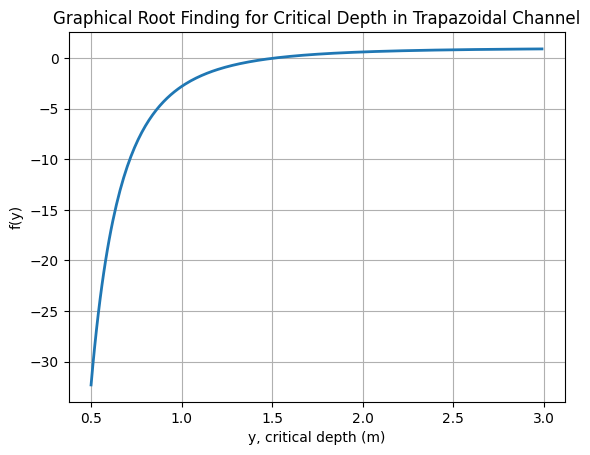

Critical depth from bisection: y = 1.506 m
Number of iterations: 8
Approximate error: 0.00648508430609598
Critical depth from false position: y= 2.424 m
Number of iterations: 10


In [1]:
#Import packages needed
import matplotlib.pyplot as plt
import numpy as np
#Define initial variables
Q = 20 #m^3/s
g = 9.8 #m/s^2
#Function must equal 0 at the critical depth
def f(y):
  A = 3*y+(y**2/2)
  B = 3+y
  return 1-B*(Q**2)/(g*(A**3))

#Plot the graph
x = np.arange(0.5, 3, 0.01)
plt.plot(x, f(x), lw = 2)
plt.xlabel('y, critical depth (m)')
plt.ylabel('f(y)')
plt.grid(True)
plt.title('Graphical Root Finding for Critical Depth in Trapazoidal Channel')
plt.show()

#Part B
import numpy as np
#initial guesses
xl = 0.5
xu = 3
#defining the bisection function
def bisection(f, xl, xu, tol = 0.01, maxiter = 10):
  #checking for valid initial bracket
  assert f(xl) * f(xu) < 0, 'Choose xl,xu such that f(xl) * f(xu) <0'
  approx_err = 9999
  #storing errors to plot later
  errors = []
  #store xr values to calculate approximate error
  xr_vals = [0]
  #Determining if error falls below 1% or number of iterations exceeds 10 first
  while (approx_err > tol) and (len(errors) < maxiter):
    xr = (xl + xu) / 2
    test = f(xl) * f(xr)
    if test < 0:
      xu = xr
    elif test > 0:
      xl = xr

    else:
      # xr is exactly the root; error becomes 0
        approx_err = 0.0
        xr_vals.append(xr)
        errors.append(approx_err)
        break
    # this error metric is different from our class example
    # it's fine to use abs(f(xr)) instead - the answer will be slightly different
    approx_err = np.abs((xr-xr_vals[-1]) / xr)

    xr_vals.append(xr)
    errors.append(approx_err)
  return xr, errors

xr, errors = bisection(f, 0.5, 3)
#Printing final answers
print('Critical depth from bisection: y =', format(xr, '.3f'), 'm')
print('Number of iterations:', len(errors))
print('Approximate error:', str(errors[-1]))

#Part C
#Import packages needed
import numpy as np
#Defining the false position function
def falseposition(f, xl, xu, tol = 0.01, maxiter = 10):
  #Checking for valid initial bracket
  assert f(xl) * f(xu) < 0, 'Choose xl,xu such that f(xl) * f(xu) < 0'
  approx_err = 9999
  #storing errors to plot later
  errors = []
  #store xr values to calculate approximate error
  xr_vals = [0]
  #Determining if errors falls below 1% or number of iterations is
  #exceeded first
  while (approx_err > tol) and (len(errors) < maxiter):
    xr = xu - f(xu) * (xl - xu) / (f(xl) - f(xu))
    test = f(xl) * f(xr)
    if test < 0:
      xu = xr
    elif test > 0:
      xl = xr
    else:
      approx_err = 0.0
      xr_vals.append(xr)
      errors.append(approx_err)
      break

    # this error metric is different from our class example
    # it's fine to use abs(f(xr)) instead - the answer will be slightly different
    approx_err = np.abs((xr-xr_vals[-1])/xr)
    xr_vals.append(xr)
    errors.append(approx_err)
  return xr, errors
xr, errors = falseposition(f, 0.5, 3)
#Printing final answers
print('Critical depth from false position: y=', format(xr, '.3f'), 'm')
print('Number of iterations:', len(errors))

**Discussion of Results**

For the graphical method, you plot the function f(y) over the 0.5-3m and identify the root by seeing where the curve crosses zero.  The plot shows the critical depth is around 1.5m, but this method only gives a visual estimate.  The bisection starts with two values where the function changes sign and repeatedly halves the interval and it always converges steadily. Using 0.5 and 3 as the initial guesses, the method found a critical depth of 1.506m in 8 iterations, which meets the 1% error requirement. For the false position method, it also uses a sign-change interval but finds each new point by drawing a secant line. In this problem, the method converged slowly because the function is steep on one side and flatter on the other. It hit the maximum of 10 iterations and gave a less accurate value of 2.424 m.  Bisection worked faster and more accurately because the function's shape caused false position to stall.  False position can be faster in some caases, but here it did not reduce the error quickly enough.  

## <font color='red'>**Problem 8.20**</font>

Figure P8.20a shows a uniform beam subject to a linearly increasing distributed load. The equation for the resulting elastic curve is (see Fig. P8.20b)

$y=\frac{w_0}{120EIL}(-x^5+2L^2x^3-L^4x) \tag{P8.20}$

Use bisection to determine the point of maximum defleciton (that is, the value of $x$ where $dy/dx=0$). Then substitute this value into Eq. (P8.20) to determine the value of the maximum deflection. Use the following parameter values in your computation: $L=$ 600 cm, $E=$ 50,000 kN/cm$^2$, $I=$ 30,000 cm$^4$, and $w_0=$ 2.5 kN/cm.

<p align="center">
  <img src="https://github.com/cdefinnda/ECI-115_HW-Images/blob/main/HW4_Fig.P8.20.png?raw=true" alt="Fig. P8.20" width=500>
</p>

<font color='red'> **TL;DR**:
Explain the approach for determining the maximum deflection of the beam by take the derivative of the function above and using a root finding method. Create a program that uses the bisection method or false position to determine the $x$ value that correspond with the point of maximum deflection (hint: it may be useful to plot the above function and its derivative to visualize where the point of maximum deflection might be—this can inform your initial guesses for the bisection method). Finally, plug this $x$ value into the original function above to determine the value of the maximum deflection. Discuss the physical interpretation of these results and how this compares to your original plots.
</font>

### <font color='blue'>**Solution 8.20**</font>



In [7]:
import numpy as np

# Given constants
L = 600
E = 50000
I = 30000
w0 = 2.5

def y(x):
  return (w0 / (120 * E * I)) * (-x**5 + 2*(L**2)*(x**3) - (L**4)*x)

def dy_f(x):
  return (w0 / (120 * E * I)) * (-5*x**4 + 6*(L**2)*x**2 - (L**4))

def bisection(f, xl, xu, es=1e-3, maxit=30):
  fl = f(xl)
  fu = f(xu)
  if fl * fu > 0:
    raise ValueError("Bisection requires root bracketing.")

  xr_old = xl
  errors = []

  for i in range(maxit):
    xr = (xl + xu) / 2.0
    fr = f(xr)

    if i > 0:
      ea = abs((xr - xr_old) / xr) * 100
      errors.append(ea)
      if ea < es:
          break

    if fl * fr < 0:
      xu = xr
      fu = fr
    else:
      xl = xr
      fl = fr

    xr_old = xr

  return xr, errors


# *** THIS MUST BE OUTSIDE THE FUNCTION ***
xr, errors = bisection(dy_f, 0, 599, 0.001, 30)

print('The point of maximum deflection occurs at: x =', format(xr, '.2f'), 'cm')
print('The value of maximum deflection is y=', format(y(xr),'.3f'), 'cm')


The point of maximum deflection occurs at: x = 268.33 cm
The value of maximum deflection is y= -309.114 cm


**Discussion of Results**

In order to find maximum deflection of the beam, we would first look for the point where the beam stops bending downward and begins to bend upward again.  This will happen when the slope of the deflection curve is zero, which means we take the derivative of the deflection equation and set it equal to zero.  The derivative ends up being a fourth-degree equation and we use the bisection method to find where the derivative crosses zero.  The bisection method works by starting with two x -values and then we check the sign of the derivative.  After that we repeatedly cut the interval in half until it pinpoints the exact x-location.  Once we find that value of x, we plug it back into the orginal deflection equation to get the maximum deflection.

Physically, this point would represent the lowest spot on the beam where it bends the most under the triangular load. Because the load is heavier on the right side, the maximum deflection also occurs on that side of the beam.  This result matches what we saw in the orginal plots where the curve is doing to dip lower near the heavier load and the numerical root-finding gives a precise location of that minimum point.